In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
hpi = pd.read_csv('dataset/monthly-hpi.csv')
uemp = pd.read_csv('dataset/unemployment-macro.csv')
ffr = pd.read_csv('dataset/fed_funds.csv')
shiller = pd.read_csv('dataset/shiller.csv')
gdp = pd.read_csv('dataset/gdp.csv')

In [3]:
df = (shiller.merge(hpi,on='date')
      .merge(uemp,on='date')
      .merge(ffr,on='date')
      .merge(gdp,on='date'))

df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


In [12]:
df.shape

(23, 16)

In [4]:
df.columns

Index(['date', 'sp500', 'consumer_price_index', 'long_interest_rate',
       'housing_price_index', 'total_unemployed', 'more_than_15_weeks',
       'not_in_labor_searched_for_work', 'multi_jobs', 'leavers', 'losers',
       'federal_funds_rate', 'total_expenditures', 'labor_force_pr',
       'producer_price_index', 'gross_domestic_product'],
      dtype='object')

In [7]:
X=df[['total_unemployed','long_interest_rate','federal_funds_rate','consumer_price_index','gross_domestic_product']]
y=df['housing_price_index']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(18, 5)

In [10]:
X_test.shape

(5, 5)

In [13]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
y_pred = lm.predict(X_test)

In [15]:
y_pred

array([217.83857727, 195.19775334, 174.70873293, 193.04791104,
       220.72744727])

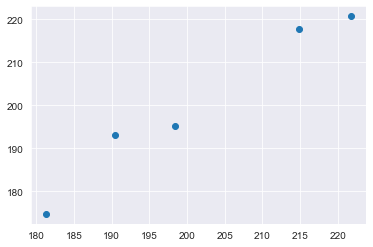

In [16]:
plt.scatter(y_test,y_pred)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R-Squared : {r2_score(y_test,y_pred)}')

Mean Absolute Error : 3.2725109556699636
Mean Squared Error : 14.152857360440237
Root Mean Squared Error : 3.762028357208414
R-Squared : 0.9370332912813679
